# Data Mining / Prospecção de Dados

## Sara C. Madeira, 2019/20

## Project 3 - Classification/Regression

### Logistics

**In a "normal" scenario students should work in teams of 2 people. Due to the social distance imposed by current public health situation, students were allowed to work in groups of 1 and 3. In this context, the amount of work was adapted according to the number of students in groups as described below.**

* Tasks **1 to 4** should be done by **all** groups **BUT**
    * In Tasks **2 and 3** the number of classifiers/regressors to use is **`X` = 2, 3 and 4**  for groups of 1, 2 and 3 students, respectively.
    * In Task **4**, groups of 1, 2 and 3 students should try 1, 2 and 3 ensemble approaches, respectively.

The quality of the project will then dictate its grade.

**The project's solution should be uploaded in Moodle before the end of June, 9th 2020 (23:59).** 

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. Note that you can use `PD_201920_Project3.ipynb`as template.**

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 

**Decisions should be justified and results should be critically discussed.**

### Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/). You are also allowed to use [Orange3](https://orange.biolab.si).**

The dataset to be analysed is **`ModifiedHousePrices.csv`**, a modified version of the train dataset used in Kaggle's competition ["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). 

If you ask a home buyer to describe their dream house, they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With more than 70 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**This project challenges you twice** by asking you to tackle a
1. **Regression Task**: predict the price, and a
2. **Classification Task**: predict a price category.

The variables are described [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

The targets are:
1. `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict in the regression task (same as in the Kaggle challenge).
2. `Price3Classes` - the price category, where price can be below 200000 ("<200000"), between 200000 and 400000 ("[200000,400000]"), or above 200000 (">200000"). This is the target variable that you're trying to predict in the classification task. 

## 1. Load and Preprocess Dataset

Here you might consider useful to think about:
1. Missing Value Imputation
2. Feature Selection
3. Class Imbalance

### Inicializations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pd_utils as utils

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn import neighbors


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import ensemble
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

from scipy import stats
import matplotlib.pyplot as plt  # Matlab-style plotting

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ModifiedHousePrices.csv')

In [3]:
df= df.drop(["Id"], axis=1)

In [4]:
df.Price3Classes.value_counts()

<200000            1025
[200000,400000]     407
>400000              28
Name: Price3Classes, dtype: int64

### 1.1. Missing Data

- Existem várias feautures com missing data. 
- Podemos deduzir que muitas delas não estão preenchidas porque são caracteriscas que não estão presentes nas casas.
- Para as features 'Electrical','MSZoning','KitchenQual','Exterior1st','Exterior2nd','SaleType' os valores a null foram repostos com a moda
- Os parametros a null das restantes features com valores numéricos foram preenchidas a 0 e das strings com "None".

In [5]:
missing_data = utils.missing_data(df)
missing_data_t = missing_data[missing_data['Total']>0]
missing_data_t

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


In [6]:
for i in missing_data_t.index:
    print(i, ': \t',df[i].unique(),)

PoolQC : 	 [nan 'Ex' 'Fa' 'Gd']
MiscFeature : 	 [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley : 	 [nan 'Grvl' 'Pave']
Fence : 	 [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu : 	 [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage : 	 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageYrBlt : 	 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983

In [7]:
l_col = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
         'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
         'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"MasVnrType",'MSSubClass']

for i in l_col:
    df[i] = df[i].fillna("None")
    
zero_col = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1',
         'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
         'BsmtHalfBath',"MasVnrArea"]

for i in zero_col:
    df[i] = df[i].fillna(0)    

mode_col = ['Electrical','MSZoning','KitchenQual','Exterior1st','Exterior2nd','SaleType']

for i in mode_col:
    df[i] = df[i].fillna(df[i].mode()[0])   
    

df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))    

df["Functional"] = df["Functional"].fillna("Typ")
    
df = df.drop(['Utilities'], axis=1)


In [8]:
missing_data = utils.missing_data(df)
missing_data_t = missing_data[missing_data['Total']>0]
missing_data_t

,Total,Percent


### 1.2. Feature selection

Criação de Features:
- Total SF - Soma da área habitável total ('TotalBsmtSF' + '1stFlrSF' + '2ndFlrSF')
- Neighbourhood mean value - Valor médio das casas dessa vizinhança

Standarization dos valores numéricos

Selecção das features com maior correlação com os targets ('SalePrice', 'Price3Classes')
-  'OverallQual', 'TotalSF', 'NeighborhoodMeanValue', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea',
 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'KitchenQual', 'FullBath'

#### Create Relevant Features

##### Total SF

In [9]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

##### Neighbourhood mean value

In [10]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [11]:
df['NeighborhoodMeanValue'] = df.groupby(['Neighborhood'])["SalePrice"].transform('mean')

#### Standarization

In [12]:
df['MoSold'] = df['MoSold'].astype(str)

In [13]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].astype("category").cat.codes
    elif i != "SalePrice" and i != "Price3Classes":
        df[i] = preprocessing.scale(df[i])


In [14]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price3Classes,TotalSF,NeighborhoodMeanValue
0,0.073375,3,-0.231877,-0.207142,1,1,3,3,4,0,...,1,-0.087688,4,0.138777,8,4,208500,2,-0.001277,0.290573
1,-0.872563,3,0.437043,-0.091886,1,1,3,3,2,0,...,1,-0.087688,7,-0.614439,8,4,181500,0,-0.052407,0.986242
2,0.073375,3,-0.098093,0.073480,1,1,0,3,4,0,...,1,-0.087688,11,0.138777,8,4,223500,2,0.169157,0.290573
3,0.309859,3,-0.454850,-0.096897,1,1,0,3,0,0,...,1,-0.087688,4,-1.367655,8,0,140000,0,-0.114493,0.506380
4,0.073375,3,0.615421,0.375148,1,1,0,3,2,0,...,1,-0.087688,3,0.138777,8,4,250000,2,0.944631,2.631741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,3,-0.365661,-0.260560,1,1,3,3,4,0,...,1,-0.087688,10,-0.614439,8,4,175000,0,0.040114,0.203437
1456,-0.872563,3,0.660016,0.266407,1,1,3,3,4,0,...,1,-0.087688,4,1.645210,8,4,210000,2,1.275760,0.138579
1457,0.309859,3,-0.187282,-0.147810,1,1,3,3,4,0,...,3,4.953112,7,1.645210,8,4,266500,2,1.126022,0.506380
1458,-0.872563,3,-0.098093,-0.080160,1,1,3,3,4,0,...,1,-0.087688,6,1.645210,8,4,142125,0,-0.500404,-0.597937


#### Filter Features

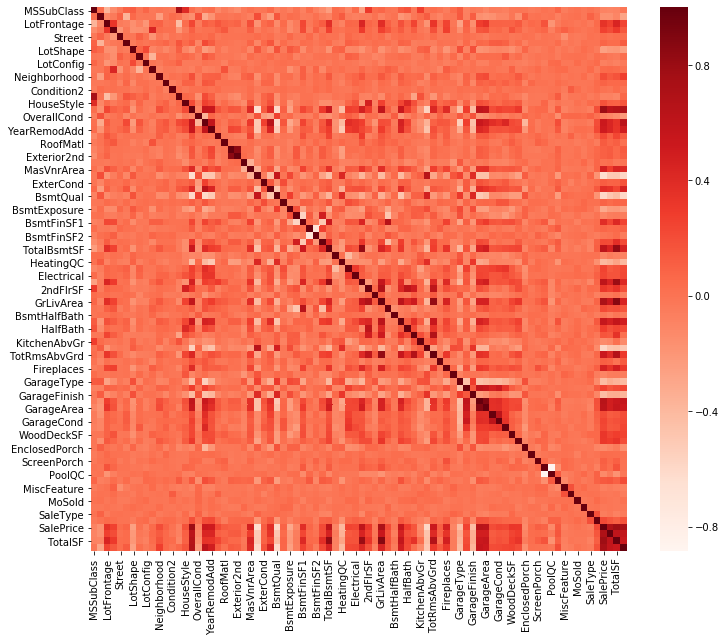

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [16]:
cor_target = abs(cor["SalePrice"])
ft1 = pd.DataFrame(cor_target.sort_values(ascending=False)).head(12)
ft1 = ft1.rename(columns={"SalePrice": "correlation"})
ft1

,correlation
SalePrice,1.000000
OverallQual,0.790982
TotalSF,0.782260
NeighborhoodMeanValue,0.738630
GrLivArea,0.708624
Price3Classes,0.703714
GarageCars,0.640409
ExterQual,0.636884
GarageArea,0.623431
TotalBsmtSF,0.613581


In [17]:
cor_target_classes = abs(cor["Price3Classes"])
ft2 = pd.DataFrame(cor_target_classes.sort_values(ascending=False)).head(12)
ft2 = ft2.rename(columns={"Price3Classes": "correlation"})
ft2

,correlation
Price3Classes,1.000000
SalePrice,0.703714
OverallQual,0.626022
TotalSF,0.595971
NeighborhoodMeanValue,0.585339
GrLivArea,0.546773
ExterQual,0.505521
GarageCars,0.488532
GarageArea,0.488424
BsmtQual,0.481285


In [18]:
ft = pd.concat([ft1,ft2])
features = ft.index.to_list()
features = list(dict.fromkeys(features))
features

['SalePrice',
 'OverallQual',
 'TotalSF',
 'NeighborhoodMeanValue',
 'GrLivArea',
 'Price3Classes',
 'GarageCars',
 'ExterQual',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'KitchenQual',
 'FullBath']

In [19]:
df = df[features]

### 1.3 Class Imbalance

Under-Sampling da classe maioritária através de cluster centroids
Over-Sampling da classe menor através de SMOTE
Ficando assim o dataset distribuido com 407 entradas de cada classe.


Split do Dataset em treino/teste

0  -  "<200000"   

1  -  ">400000"

2  -  "[200000,400000]"

In [20]:
df.Price3Classes.value_counts()

0    1025
2     407
1      28
Name: Price3Classes, dtype: int64

In [21]:
df0 = df[df["Price3Classes"]==0]
df1 = df[df["Price3Classes"]==1]
df2 = df[df["Price3Classes"]==2]

#### Under-sampling: Cluster Centroids

In [22]:
from imblearn.under_sampling import ClusterCentroids

X = pd.concat([df0,df2])

y_r = X["Price3Classes"] 


X= X.drop(["Price3Classes"], axis=1)

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X, y_r)

y_cc.value_counts()

Using TensorFlow backend.
C:\Users\Miguel\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Miguel\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Miguel\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Miguel\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

2    407
0    407
Name: Price3Classes, dtype: int64

In [23]:
X_cc["Price3Classes"] = y_cc

In [24]:
X =pd.concat([X_cc,df1])

#### Over-sampling - SMOTE

In [25]:
# check version number
from imblearn.over_sampling import SMOTE

y = X["Price3Classes"] 

X= X.drop(["Price3Classes"], axis=1)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [26]:
y.value_counts()

2    407
1    407
0    407
Name: Price3Classes, dtype: int64

#### Split data to train/test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
y_train_r = X_train["SalePrice"]
y_test_r  = X_test["SalePrice"]

X_train = X_train.drop(["SalePrice"], axis=1)
X_test  = X_test.drop(["SalePrice"], axis=1)

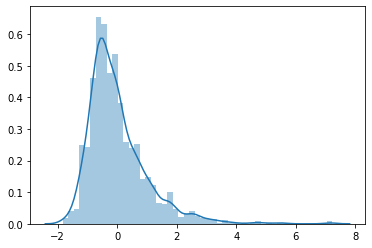

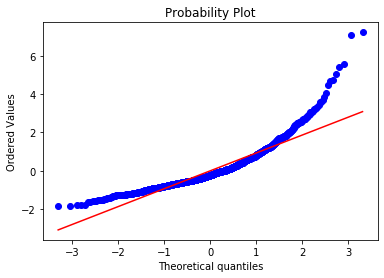

In [29]:
sns.distplot(preprocessing.scale(df["SalePrice"]))

fig = plt.figure()
res = stats.probplot(preprocessing.scale(df["SalePrice"]), plot=plt)
plt.show()

## 2. Learning Simple Classifiers

* Choose **`X` classifiers** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and stratified 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Present mean and standard deviation of accuracy, precision and recall.
* Show confusion matrices.

### 2.1 SVC - Support Vector Classifier

- params = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

- mean = 0.9368

- Std  = 0.0241

- Accuracy - 0,93

In [57]:
param_grid = {'C': [0.1,1, 10,100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True, cv = 10, return_train_score=True)
grid_results = grid.fit(X_train,y_train)
print(grid_results.best_score_)
print(grid_results.best_params_)
i = list(grid_results.cv_results_['rank_test_score']).index(1)
print("Std = ",grid_results.cv_results_['std_test_score'][i])

0.9367715458276334
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Std =  0.024140398641024102


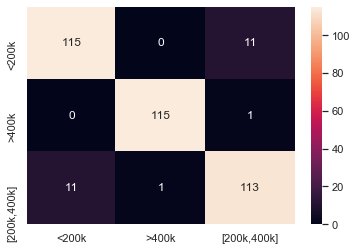

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       126
           1       0.99      0.99      0.99       116
           2       0.90      0.90      0.90       125

    accuracy                           0.93       367
   macro avg       0.94      0.94      0.94       367
weighted avg       0.93      0.93      0.93       367



In [58]:
grid_predictions = grid.predict(X_test)

corr =confusion_matrix(y_test,grid_predictions)
ax = sns.heatmap(data= corr, annot=True, fmt="d")
#0  -  "<200000"   
#1  -  ">400000"
#2  -  "[200000,400000]"
labels = ["<200k",">400k","[200k,400k]"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show() 

print(classification_report(y_test,grid_predictions))

### 2.2 Nearest Neighbors
- params = {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

- mean = 0.9344

- Std  = 0.0329

- Accuracy - 0,94

In [32]:
grid_params = { 'n_neighbors' : list(range(2,15)), 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan'] }
grid = GridSearchCV( neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
grid_results = grid.fit(X_train, y_train)
print(grid_results.best_score_)
print(grid_results.best_params_)
i = list(grid_results.cv_results_['rank_test_score']).index(1)
print("Std = ",grid_results.cv_results_['std_test_score'][i])

Fitting 10 folds for each of 52 candidates, totalling 520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed:    2.8s finished


0.9344049247606019
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Std =  0.032946178226919975


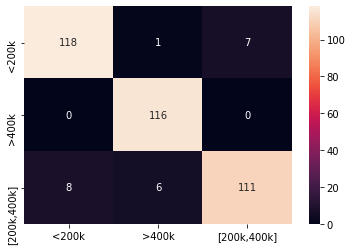

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       126
           1       0.94      1.00      0.97       116
           2       0.94      0.89      0.91       125

    accuracy                           0.94       367
   macro avg       0.94      0.94      0.94       367
weighted avg       0.94      0.94      0.94       367



In [34]:
grid_predictions = grid.predict(X_test)

corr =confusion_matrix(y_test,grid_predictions)
ax = sns.heatmap(data= corr, annot=True, fmt="d")
#0  -  "<200000"   
#1  -  ">400000"
#2  -  "[200000,400000]"
labels = ["<200k",">400k","[200k,400k]"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show() 

print(classification_report(y_test,grid_predictions))

### 2.3 Decision Trees
- params = {'max_leaf_nodes': 45, 'min_samples_split': 3}

- mean = 0.9075

- Std  = 0.0366

- Accuracy - 0,93

In [35]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv = 10)
grid_results = grid.fit(X_train, y_train)


print(grid_results.best_params_)
i = list(grid_results.cv_results_['rank_test_score']).index(1)
print("Mean = ", grid_results.best_score_)
print("Std = ",grid_results.cv_results_['std_test_score'][i])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 294 candidates, totalling 2940 fits
{'max_leaf_nodes': 45, 'min_samples_split': 3}
Mean =  0.9074555403556772
Std =  0.036573757298899764


[Parallel(n_jobs=1)]: Done 2940 out of 2940 | elapsed:   15.8s finished


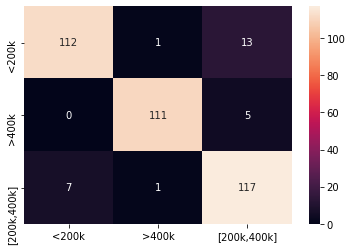

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       126
           1       0.98      0.96      0.97       116
           2       0.87      0.94      0.90       125

    accuracy                           0.93       367
   macro avg       0.93      0.93      0.93       367
weighted avg       0.93      0.93      0.93       367



In [36]:
grid_predictions = grid.predict(X_test)

corr =confusion_matrix(y_test,grid_predictions)
ax = sns.heatmap(data= corr, annot=True, fmt="d")
#0  -  "<200000"   
#1  -  ">400000"
#2  -  "[200000,400000]"
labels = ["<200k",">400k","[200k,400k]"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show() 

print(classification_report(y_test,grid_predictions))

## 2.4 Conclusions

Accuracy:
1. SVM - 0,93
    - precision e recall superior a 90% em todas as classes;
        - a classe ">400k" tem precisão e recall de 99%. Isto deverá ser por causa de existirem poucas entradas no dataset original e com o over-sampling são geradas entradas muito semelhantes o que irá fazer com que haja um overfitting desta classe.
2. **Nearest Neighbors** - 0.94
    - precision de 94% para todas as classes e recall de 100% para a classe ">400k"
        - Como o over sampling é feito através de SMOTE irão ser criadas entradas próximas das existentes na classe, isto poderá explicar o recall de 100%.
        - Existencia de uma previsão de ">400k" na classe "<200k" - Poderá ser um outlier
3. Decision Tree - 0.93
    - precision e recall médio de 93%
        - Existencia de uma previsão de ">400k" na classe "<200k" - Poderá ser um outlier
    

## 3. Learning Simple Regressors

* Choose **`X` regressors** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Use the mean absolute error regression loss, or other relevant metrics.

### 3.1. SVR

In [37]:
param_grid = {'C': [0.1,1, 10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}#, 'poly'] 'sigmoid']}

grid = GridSearchCV(SVR(), param_grid, cv=10)
grid.fit(X_train,y_train_r)

grid_results = grid.fit(X_train, y_train_r)
print(grid_results.best_score_)
print(grid_results.best_params_)

0.019408031784515035
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [38]:
grid_predictions = grid.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test_r, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test_r, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, grid_predictions)))

MAE: 117064.85110946235
MSE: 22797095511.752598
RMSE: 150987.0706774345


### 3.2. Nearest Neighbors

In [39]:
param_grid = { 'n_neighbors' : [3,5,11,15,18,19,20], 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan','minkowski','chebyshev']}

grid = GridSearchCV(neighbors.KNeighborsRegressor(), param_grid, cv=10)
grid.fit(X_train,y_train_r)

grid_results = grid.fit(X_train, y_train_r)
print(grid_results.best_score_)
print(grid_results.best_params_)

0.9488368788754438
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [40]:
from sklearn import metrics

grid_predictions = grid.predict(X_test)
#grid_results = grid_results.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test_r, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test_r, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, grid_predictions)))

MAE: 20602.342425502546
MSE: 1503795014.194038
RMSE: 38778.79593533092


In [41]:
for i in range(len(grid_predictions)):
    print(i," : ",grid_predictions[i],"\t: ",y_test_r.to_list()[i],"\t: ",y_test_r.to_list()[i]-grid_predictions[i])

0  :  218115.69242095377 	:  275000 	:  56884.30757904623
1  :  106678.97822025501 	:  102776 	:  -3902.9782202550123
2  :  191351.41748757148 	:  187500 	:  -3851.4174875714816
3  :  440938.8800461955 	:  440749 	:  -189.8800461955252
4  :  257781.51016584606 	:  294000 	:  36218.48983415394
5  :  147227.74351297572 	:  133900 	:  -13327.743512975721
6  :  327743.7773923031 	:  301500 	:  -26243.777392303105
7  :  316002.38945539936 	:  274900 	:  -41102.38945539936
8  :  92900.0 	:  87500 	:  -5400.0
9  :  132507.40263531022 	:  177000 	:  44492.59736468978
10  :  440493.1405306791 	:  436343 	:  -4150.140530679084
11  :  433920.444007461 	:  335000 	:  -98920.44400746102
12  :  311816.4812296679 	:  250000 	:  -61816.4812296679
13  :  230000.0 	:  207500 	:  -22500.0
14  :  334145.31528552383 	:  287000 	:  -47145.31528552383
15  :  354836.4079980664 	:  318061 	:  -36775.407998066396
16  :  406290.5988497621 	:  310000 	:  -96290.59884976211
17  :  275445.2227632323 	:  251000 	:  

151  :  430748.1018483023 	:  420171 	:  -10577.101848302293
152  :  213791.30128387027 	:  244000 	:  30208.69871612973
153  :  329754.4099907294 	:  278000 	:  -51754.409990729415
154  :  191481.0635653688 	:  178000 	:  -13481.063565368793
155  :  211275.3177364121 	:  274725 	:  63449.68226358789
156  :  205239.84692774783 	:  214500 	:  9260.153072252171
157  :  474423.17207277415 	:  474042 	:  -381.17207277414855
158  :  134735.38575220166 	:  159950 	:  25214.614247798338
159  :  424565.18662760255 	:  424136 	:  -429.1866276025539
160  :  356279.15898581175 	:  302000 	:  -54279.15898581175
161  :  170269.51430388374 	:  168500 	:  -1769.5143038837414
162  :  78329.7919716373 	:  92000 	:  13670.2080283627
163  :  431427.2483812076 	:  432299 	:  871.7516187924193
164  :  122990.20958804213 	:  128000 	:  5009.790411957874
165  :  119549.11167157127 	:  135500 	:  15950.88832842873
166  :  201897.9881029461 	:  205000 	:  3102.0118970538897
167  :  256567.1447485521 	:  315000

325  :  209080.94691841298 	:  216000 	:  6919.053081587015
326  :  270180.873939622 	:  299800 	:  29619.12606037798
327  :  576240.1221608117 	:  611657 	:  35416.877839188324
328  :  399135.3988403032 	:  402094 	:  2958.6011596968165
329  :  386073.8617454144 	:  325000 	:  -61073.86174541438
330  :  218100.85686024203 	:  151400 	:  -66700.85686024203
331  :  179113.74442287607 	:  150500 	:  -28613.744422876072
332  :  271868.54684776766 	:  225000 	:  -46868.54684776766
333  :  208640.91261042317 	:  212000 	:  3359.087389576831
334  :  241396.34394326402 	:  250000 	:  8603.656056735985
335  :  184502.94603653916 	:  177000 	:  -7502.946036539157
336  :  160369.71144126894 	:  161500 	:  1130.2885587310593
337  :  210563.75585214572 	:  183000 	:  -27563.755852145725
338  :  191739.85568203547 	:  173900 	:  -17839.85568203547
339  :  93305.31023153503 	:  76500 	:  -16805.310231535026
340  :  183570.53644925804 	:  165400 	:  -18170.53644925804
341  :  438233.53941130574 	:  3

### 3.3. Decision Tree Regressor

In [42]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
grid.fit(X_train,y_train_r)

grid_results = grid.fit(X_train, y_train_r)
print(grid_results.best_score_)
print(grid_results.best_params_)

0.9025855348046384
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [43]:
grid_predictions = grid.predict(X_test)
#grid_results = grid_results.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test_r, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test_r, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, grid_predictions)))

MAE: 31446.83305753279
MSE: 2458671928.321952
RMSE: 49584.99700838906


In [44]:
for i in range(len(grid_predictions)):
    print(i," : ",grid_predictions[i],"\t: ",y_test_r.to_list()[i],"\t: ",y_test_r.to_list()[i]-grid_predictions[i])

0  :  226988.8108108108 	:  275000 	:  48011.1891891892
1  :  118059.70588235294 	:  102776 	:  -15283.705882352937
2  :  183040.0 	:  187500 	:  4460.0
3  :  422140.25 	:  440749 	:  18608.75
4  :  260841.33333333334 	:  294000 	:  33158.66666666666
5  :  149854.32432432432 	:  133900 	:  -15954.32432432432
6  :  284287.5238095238 	:  301500 	:  17212.476190476213
7  :  312264.96153846156 	:  274900 	:  -37364.96153846156
8  :  73515.80769230769 	:  87500 	:  13984.192307692312
9  :  118059.70588235294 	:  177000 	:  58940.29411764706
10  :  435189.95 	:  436343 	:  1153.0499999999884
11  :  312264.96153846156 	:  335000 	:  22735.03846153844
12  :  274658.8888888889 	:  250000 	:  -24658.888888888876
13  :  229752.18181818182 	:  207500 	:  -22252.181818181823
14  :  284287.5238095238 	:  287000 	:  2712.4761904762127
15  :  396743.63636363635 	:  318061 	:  -78682.63636363635
16  :  312264.96153846156 	:  310000 	:  -2264.961538461561
17  :  274658.8888888889 	:  251000 	:  -23658.8

288  :  249605.75675675675 	:  236500 	:  -13105.756756756746
289  :  249605.75675675675 	:  220000 	:  -29605.756756756746
290  :  435189.95 	:  433477 	:  -1712.9500000000116
291  :  284287.5238095238 	:  271900 	:  -12387.523809523787
292  :  422924.2413793103 	:  436887 	:  13962.758620689681
293  :  226988.8108108108 	:  260000 	:  33011.1891891892
294  :  312264.96153846156 	:  314813 	:  2548.038461538439
295  :  159693.4090909091 	:  157900 	:  -1793.4090909090883
296  :  312264.96153846156 	:  350000 	:  37735.03846153844
297  :  524473.92 	:  544247 	:  19773.079999999958
298  :  454592.39285714284 	:  402952 	:  -51640.39285714284
299  :  422924.2413793103 	:  428048 	:  5123.758620689681
300  :  422924.2413793103 	:  408929 	:  -13995.241379310319
301  :  226988.8108108108 	:  200000 	:  -26988.8108108108
302  :  118059.70588235294 	:  112000 	:  -6059.705882352937
303  :  137640.73076923078 	:  134500 	:  -3140.7307692307804
304  :  73515.80769230769 	:  106250 	:  32734.1

## 3.4. Conclusions

1. SVR - MAE = 118 582
2. **Nearest Neighbors Regressor** - MAE = 20 707
3. Decision Tree Regressor - MAE = 28 262

- O Nearst Neighbors dá um erro menor, provávelmente por causa do oversampling através do SMOTE como já foi explicado anteriormente.

## 4. Ensemble Learning

### Voting Classifier/Regressor

* Use a voting classifier (http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier) /regressor (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) to combine the best results of the `X` classifiers/regressors from previous sections. 

Classifier - Accuracy = 0.96

Regressor - MAE: 23179.088969577948

#### Classifier
Accuracy = 0.96 

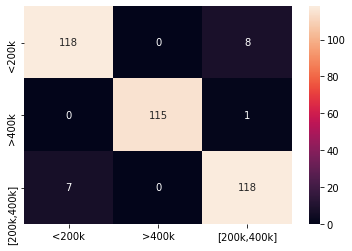

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       126
           1       1.00      0.99      1.00       116
           2       0.93      0.94      0.94       125

    accuracy                           0.96       367
   macro avg       0.96      0.96      0.96       367
weighted avg       0.96      0.96      0.96       367



In [45]:
from sklearn.ensemble import VotingClassifier

clf1 = SVC(C = 10, gamma = 0.1, kernel = 'rbf')
clf2 = neighbors.KNeighborsClassifier(**{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'})
clf3 = DecisionTreeClassifier(**{'max_leaf_nodes': 13, 'min_samples_split': 2})

eclf = VotingClassifier(estimators=[('svc', clf1), ('knn', clf2), ('dtc', clf3)], voting='hard')
eclf = eclf.fit(X_train, y_train)

y_predict = eclf.predict(X_test)

corr =confusion_matrix(y_test,y_predict)
ax = sns.heatmap(data= corr, annot=True, fmt="d")
#0  -  "<200000"   
#1  -  ">400000"
#2  -  "[200000,400000]"
labels = ["<200k",">400k","[200k,400k]"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show() 

print(classification_report(y_test,y_predict))

#### Regressor
MAE: 23179.088969577948

In [46]:
from sklearn.ensemble import VotingRegressor

#clf1 = SVR(**{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'})
clf2 = neighbors.KNeighborsRegressor(**{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'})
clf3 = DecisionTreeRegressor(**{'criterion': 'mae', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10})

#('svr', clf1), 
eclf = VotingRegressor(estimators=[('knn', clf2), ('dtc', clf3)])
eclf = eclf.fit(X_train, y_train_r)

y_predict = eclf.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test_r, y_predict))
print('MSE:', metrics.mean_squared_error(y_test_r, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, y_predict)))

MAE: 23179.088969577948
MSE: 1701874804.017724
RMSE: 41253.78532956369


### XGBoost 

* Use [XGBoost](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn).

Regression - MAE = 18 832

**Multiclass classification - Accuracy - 0.97**

#### Functions

In [47]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

    
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")    
    

#### Regression
MAE = 18 832

In [48]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

[00:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


In [49]:
print('MAE:', metrics.mean_absolute_error(y_test_r, y_pred))
print('MSE:', metrics.mean_squared_error(y_test_r, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 19382.172673279973
MSE: 770452398.0803407
RMSE: 327498.06


#### Multiclass classification
Accuracy - 0.97

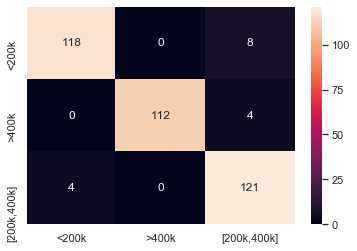

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       126
           1       1.00      0.97      0.98       116
           2       0.91      0.97      0.94       125

    accuracy                           0.96       367
   macro avg       0.96      0.96      0.96       367
weighted avg       0.96      0.96      0.96       367



In [56]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score


xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

corr = confusion_matrix(y_test, y_pred, labels=np.unique(y_pred))
ax = sns.heatmap(data= corr, annot=True, fmt="d")
labels = ["<200k",">400k","[200k,400k]"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

print(classification_report(y_test,y_pred))


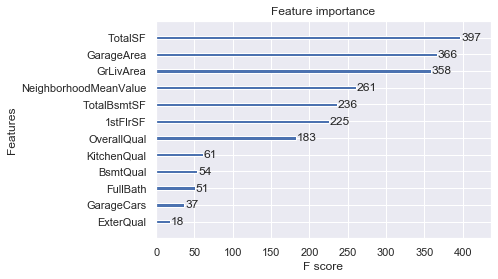

In [51]:
import graphviz

xgb.plot_importance(xgb_model)

In [52]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.15174879831076452
MSE: 0.10857882542301432
RMSE: 0.3295130125245653


### Random Forests

* Use [Random Forests](http://scikit-learn.org/stable/modules/ensemble.html#random-forests).

**Regression - MAE = 17 366**

Multiclass classification - Accuracy = 0.96

#### Regression
MAE = 17 366

In [53]:
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)

rfr.fit(X_train, y_train_r)
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test_r, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test_r, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 19330.01800882315
MSE: 913012434.5473347
RMSE: 326797.235468913


#### Multiclass classification

Accuracy = 0.96 

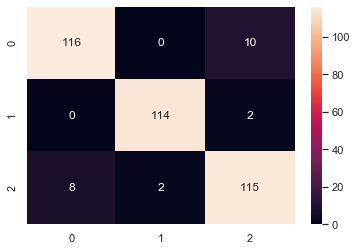

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       126
           1       0.98      0.98      0.98       116
           2       0.91      0.92      0.91       125

    accuracy                           0.94       367
   macro avg       0.94      0.94      0.94       367
weighted avg       0.94      0.94      0.94       367

Mean -  0.9967279754764761
STD -  0.004007436810561034


In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

corr = confusion_matrix(y_test, y_pred, labels=np.unique(y_pred))
ax = sns.heatmap(data= corr, annot=True, fmt="d")

plt.show()

print(classification_report(y_test,y_pred))


print("Mean - ",scores.mean())
print("STD - ",scores.std())

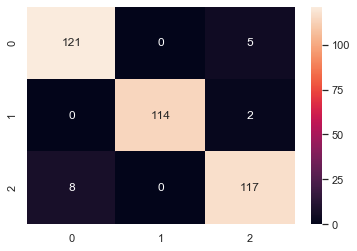

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       126
           1       1.00      0.98      0.99       116
           2       0.94      0.94      0.94       125

    accuracy                           0.96       367
   macro avg       0.96      0.96      0.96       367
weighted avg       0.96      0.96      0.96       367

Mean -  0.9729708116753297
STD -  0.013246056225243106


In [55]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

corr = confusion_matrix(y_test, y_pred, labels=np.unique(y_pred))
ax = sns.heatmap(data= corr, annot=True, fmt="d")

plt.show()

print(classification_report(y_test,y_pred))


print("Mean - ",scores.mean())
print("STD - ",scores.std())

## 4.4. Conclusions

- Regression
    - Random Forests - MAE = 17 366

- Multiclass classification
    - XGBoost - Accuracy - 0.97



- Podemos verificar que a combinação de modelos através do voting não foi favorável na classificação do dataset.
- O Ensemble Learning através da Random Forests Classification e do XGBoost regressor consegue obter melhores resultados do que os outros modelos testados.